In [1]:
library(reshape2)
library(RColorBrewer)
library(dplyr)
source("../formating/formating.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

In [2]:
datasets <- c('3p_pbmc10k_filt', '5p_pbmc10k_filt')
inputs <- c('/ps/ai-ready/data/integration/3p_pbmc10k_filt.h5', '/ps/ai-ready/data/integration/5p_pbmc10k_filt.h5')

In [ ]:
matrix_5p <- Read10X_h5(inputs[2],use.names = T)$`Gene Expression`
matrix_5p

In [ ]:
matrix_3p <- Read10X_h5(inputs[1],use.names = T)
matrix_3p

In [ ]:
names(matrix_3p)

In [ ]:
names(matrix_5p)

In [ ]:
srats1 <- load_seurat(inputs[1])
srats1

In [ ]:
srats2 <- load_seurat(inputs[2])
srats2

In [7]:
srats.list <- list()
for (i in 1:length(inputs)) {
   srats.list[[datasets[i]]] <- load_seurat(inputs[i], project = datasets[i])
#     srats.list[[datasets[i]] <- tryCatch(
#         load_seurat(inputs[i], project = datasets[i]),
#         error = function(e) {
#             stop("The file format is not supported.")
#         }
#       )
  srats.list[[i]]@meta.data$orig.ident <- srats.list[1]
  DefaultAssay(object = srats.list[[i]]) <- 'RNA'
  # srats.list[[i]] <- FindVariableFeatures(srats.list[[i]], selection.method = "vst", nfeatures = 2000, verbose = F)
}
# names(srats.list) <- datasets
srats.list

Genome matrix has multiple modalities, returning a list of matrices for this genome



$`3p_pbmc10k_filt`
An object of class Seurat 
36601 features across 10194 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

$`5p_pbmc10k_filt`
An object of class Seurat 
36601 features across 10548 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)


In [9]:
srat.harmony <- merge(srats.list[[datasets[1]]],srats.list[[datasets[2]]])
srat.harmony

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
36601 features across 20742 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

In [16]:
srat.harmony <- merge(lapply(datasets, function(x) srats.list[[x]]))
srat.harmony

In [18]:
srats.harmony <- Reduce(merge, srats.list)
srats.harmony

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
36601 features across 20742 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

In [20]:
paste(sapply(datasets, paste, collapse=":"), collapse=", ")

[1] "3p_pbmc10k_filt, 5p_pbmc10k_filt"

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5
AAACCCACATAACTCG-1_1,-9.297287,2.354115,2.394060,2.264507,-1.498184
AAACCCACATGTAACC-1_1,6.900459,-20.010201,1.473800,-3.300645,-5.090596
AAACCCAGTGAGTCAG-1_1,-17.939928,-3.318818,-5.585159,-3.104540,4.604617
AAACCCAGTGCTTATG-1_1,12.337571,1.536863,5.242054,-2.616990,1.940276
AAACGAACAGTCAGTT-1_1,-17.798957,-16.888532,-16.630599,24.171627,25.292900


ERROR: Error in plot_grid(p1, p2): could not find function "plot_grid"


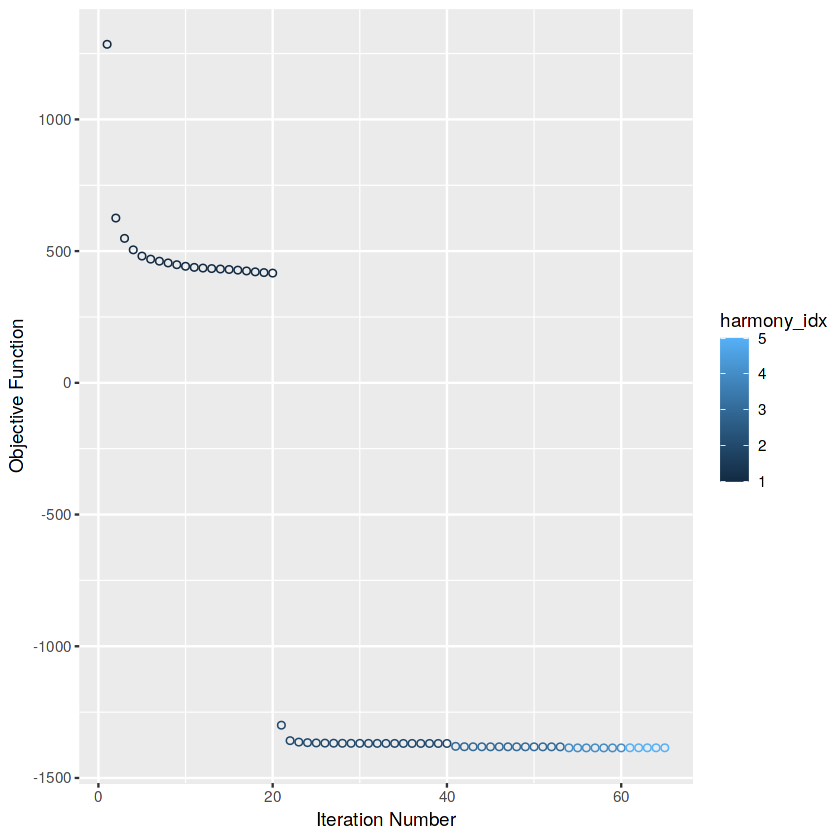

In [23]:
library(harmony)
srat.harmony <- NormalizeData(srat.harmony, verbose = F)
  srat.harmony <- FindVariableFeatures(srat.harmony, selection.method = "vst", nfeatures = 2000, verbose = F)
  srat.harmony <- ScaleData(srat.harmony, verbose = F)
  srat.harmony <- RunPCA(srat.harmony, npcs = 30, verbose = F)
  srat.harmony <- RunUMAP(srat.harmony, reduction = "pca", dims = 1:30, verbose = F)
srat.harmony <- srat.harmony %>% RunHarmony("orig.ident", plot_convergence = T)
  harmony_embeddings <- Embeddings(srat.harmony, 'harmony')
  harmony_embeddings[1:5, 1:5]

  p1 <- DimPlot(object = srat.harmony, reduction = "harmony", pt.size = .1, group.by = "orig.ident") + NoLegend()
  p2 <- VlnPlot(object = srat.harmony, features = "harmony_1", group.by = "orig.ident", pt.size = .1) + NoLegend()
  plot_grid(p1,p2)

In [27]:
library(SeuratWrappers)
library(rliger)
library(reshape2)
library(RColorBrewer)
library(dplyr)
  srat.liger <- Reduce(merge, srats.list)
  srat.liger <- NormalizeData(srat.liger)
  srat.liger <- FindVariableFeatures(srat.liger)
  srat.liger <- ScaleData(srat.liger, split.by = "orig.ident", do.center = F)
  srat.liger <- RunOptimizeALS(srat.liger, k = 30, lambda = 5, split.by = "orig.ident") ## this one takes a while
  srat.liger <- RunQuantileNorm(srat.liger, split.by = "orig.ident")
  srat.liger <- FindNeighbors(srat.liger, reduction = "iNMF", k.param = 10, dims = 1:30)
  srat.liger <- FindClusters(srat.liger)

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Scaling data matrix

Scaling data from split 3p_pbmc10k_filt

Scaling data from split 5p_pbmc10k_filt



  |======================================================================| 100%
Finished in 5.025457 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 2.772576e-05.
Best results with seed 1.


Warning message:
“No columnames present in cell embeddings, setting to 'riNMF_1:30'”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20742
Number of edges: 302659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9032
Number of communities: 28
Elapsed time: 1 seconds


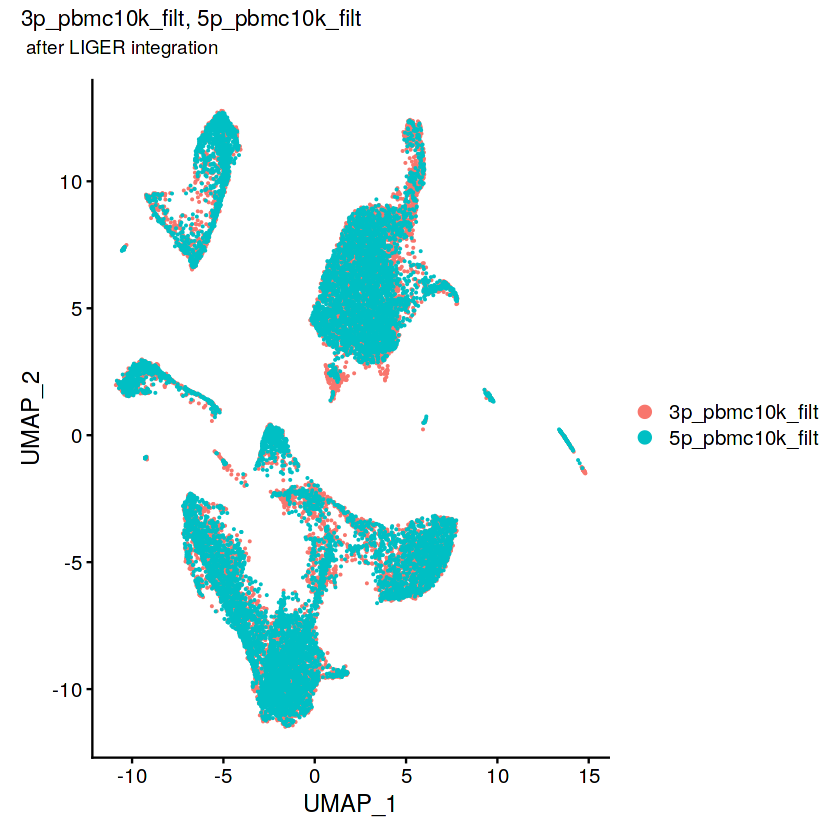

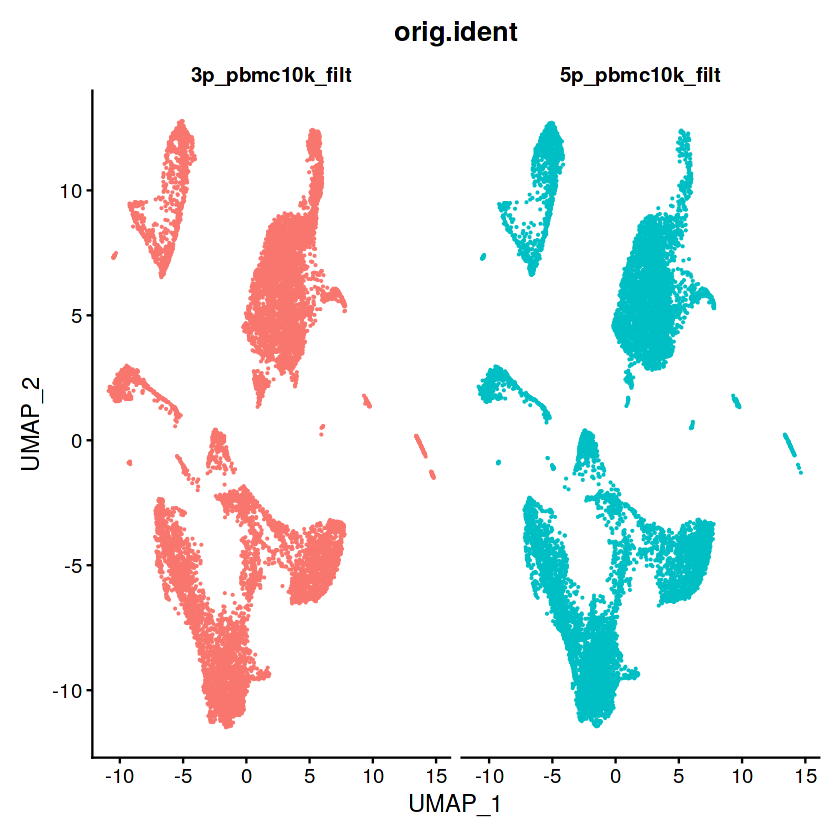

In [28]:
srat.liger <- RunUMAP(srat.liger, dims = 1:ncol(srat.liger[["iNMF"]]), reduction = "iNMF", verbose = F)
  srat.liger <- SetIdent(srat.liger,value = "orig.ident")
  DimPlot(srat.liger, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " after LIGER integration")
  DimPlot(srat.liger, reduction = "umap", group.by = "orig.ident", pt.size = .1, split.by = 'orig.ident') + NoLegend()

In [ ]:
for (age in ages) {
    print(age$key)
    print(age$value)
}

In [ ]:
l

In [ ]:
for(i in l){
    print(names(i))
    print(i)
}